In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

In [10]:
df = pd.read_csv('./MLS2.csv')

In [11]:
homes_listed_by_zip = df['Zip Code'].value_counts().reset_index()
homes_listed_by_zip.columns = ['Zip Code', 'Number of Homes Listed']

homes_listed_by_zip

,Zip Code,Number of Homes Listed
0,77493,222
1,77433,218
2,77018,90
3,77091,82
4,77375,73
...,...,...
75,77042,1
76,77041,1
77,77023,1
78,77016,1


In [12]:
sum_homes_listed = homes_listed_by_zip['Number of Homes Listed'].sum()

sum_homes_listed

1781

In [13]:
#find the average prices of each home for each zip code and replace the price as an integer

df['List Price'] = df['List Price'].replace('[\$,]', '', regex=True).astype(float)
average_list_price_by_zip = df.groupby('Zip Code')['List Price'].mean().reset_index()

# merge the two df together

df_merged = average_list_price_by_zip.merge(homes_listed_by_zip, on='Zip Code')

# Round the List Price to remove decimal places
df_merged['List Price'] = df_merged['List Price'].astype(int)
df_merged

,Zip Code,List Price,Number of Homes Listed
0,77002,380000,1
1,77003,437026,19
2,77004,436192,45
3,77007,480190,10
4,77008,468219,48
...,...,...,...
75,77546,426950,2
76,77571,416698,26
77,77581,415000,1
78,77586,433835,6


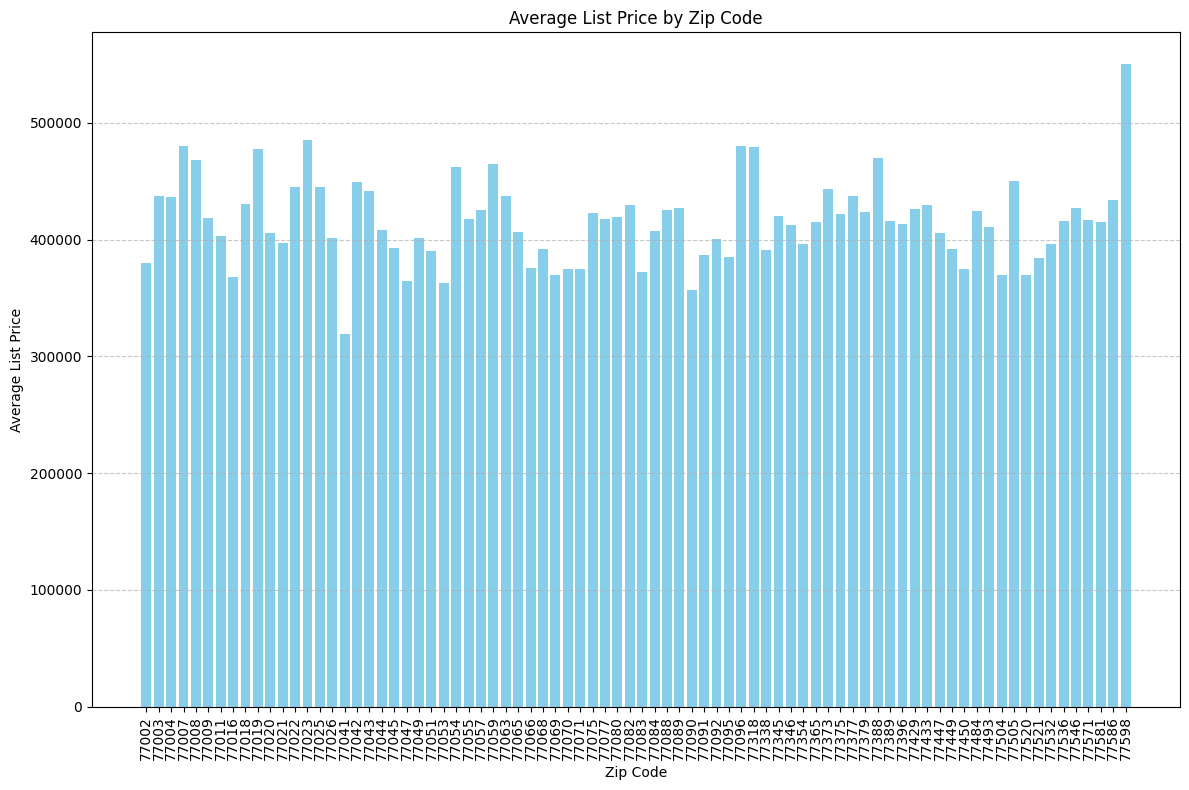

In [14]:
# Create a bar chart of average list price by zip code with clearer formatting

plt.figure(figsize=(12, 8))
plt.bar(df_merged['Zip Code'].astype(str), df_merged['List Price'], color='skyblue')
plt.title('Average List Price by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Average List Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# use "tight layout" fit into the figure area and minimizes the overlap between subplots and ensures that the subplots are properly spaced and aligned within the figure. 
plt.tight_layout()
plt.show()

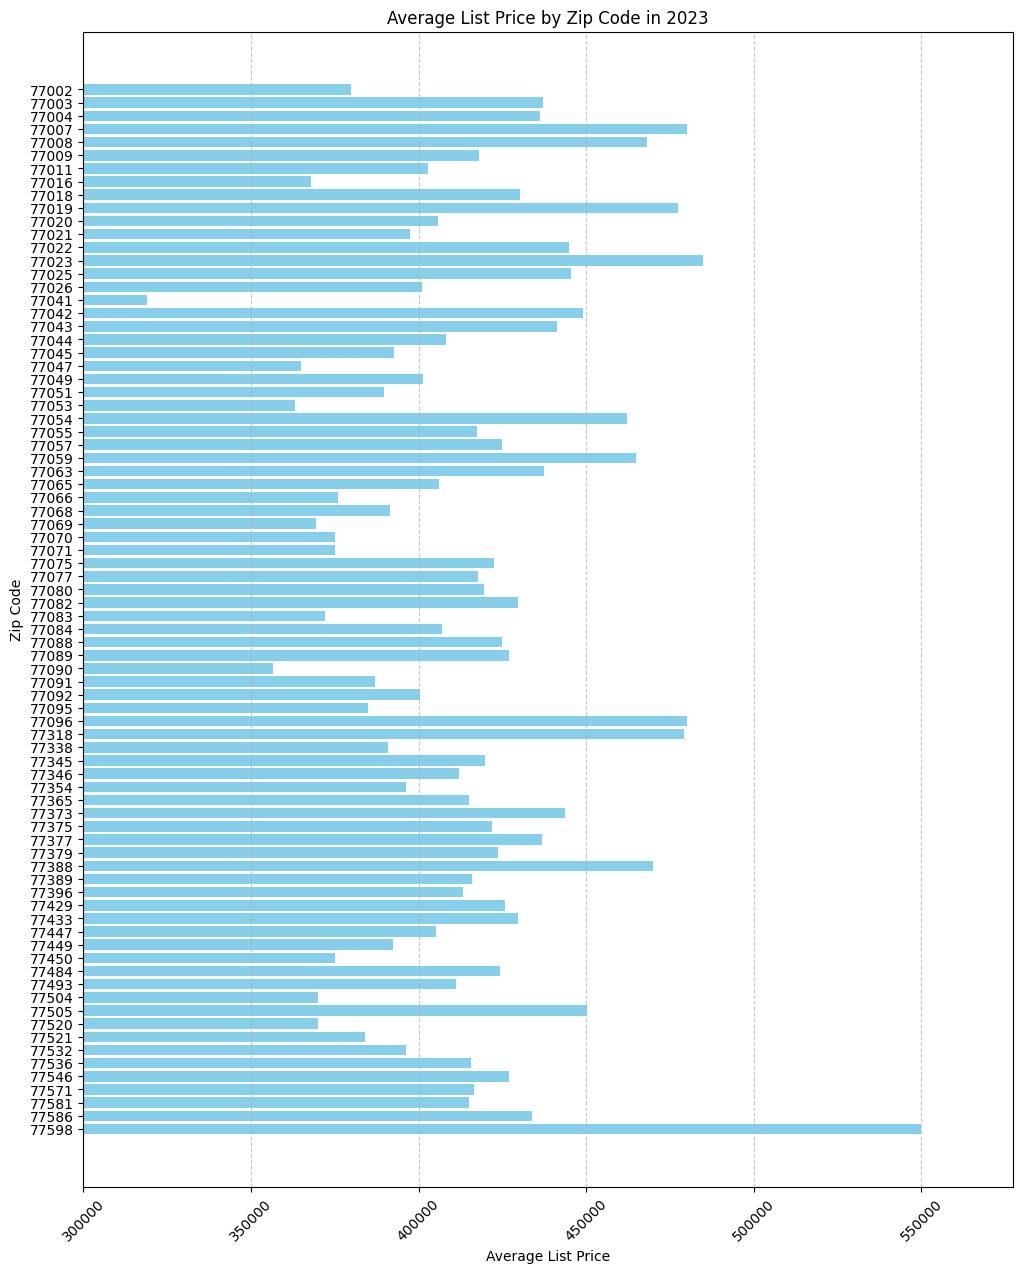

: 

In [55]:
# Sort DataFrame by Zip Code
df_sorted = df_merged.sort_values(by='Zip Code')

# Create a horizontal bar chart of average list price by zip code with clearer formatting
plt.figure(figsize=(12, 15))
plt.barh(df_sorted['Zip Code'].astype(str), df_sorted['List Price'], color='skyblue')
plt.title('Average List Price by Zip Code in 2023')
plt.xlabel('Average List Price')
plt.ylabel('Zip Code')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust tick spacing for better readability
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest ZIP code at the top
plt.xlim(300000, plt.xlim()[1])

# Use "tight layout" to fit into the figure area and minimize overlap
plt.tight_layout
plt.show()

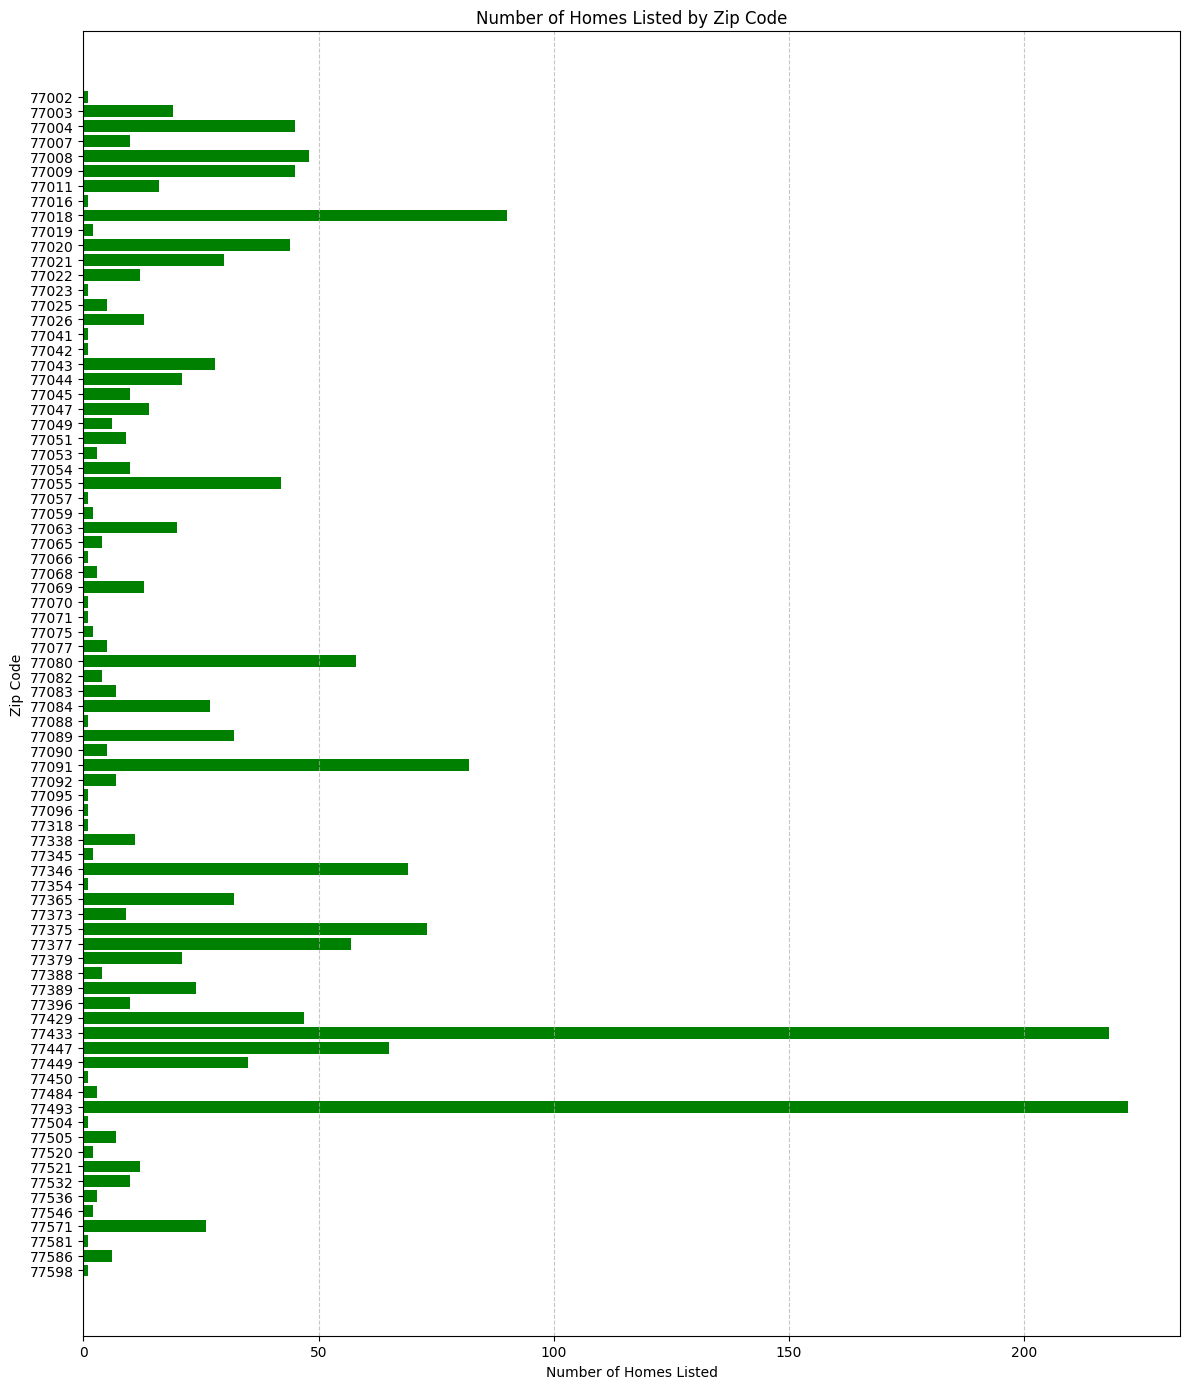

In [51]:
# Create a horizontal bar chart of the number of homes listed by ZIP code with clearer formatting
plt.figure(figsize=(12, 14))

# Using .astype(str) will condense the chart
plt.barh(df_sorted['Zip Code'].astype(str), df_sorted['Number of Homes Listed'], color='green')
plt.title('Number of Homes Listed by Zip Code')
plt.xlabel('Number of Homes Listed')
plt.ylabel('Zip Code')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Switch to 'x' axis for gridlines
plt.tight_layout()
plt.gca().invert_yaxis()  # Invert y-axis to have the lowest ZIP code at the top

# Show the chart
plt.show()